<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/assgn2_PrasanthParaseelli_AI00051_DL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.utils.data as data
import numpy as np
import os
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
plt.ion()

class ClassificationNeuralNet(nn.Module):

    def __init__(self, num_classes=20):
      
        super(ClassificationNeuralNet, self).__init__()
        self.c1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.c1_bNorm = nn.BatchNorm2d(64)
        self.c1_relu = nn.ReLU()
        self.c1_mPool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.c2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.c2_bNorm = nn.BatchNorm2d(64)
        self.c2_relu = nn.ReLU()
        self.c2_mPool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.c3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.c3_bNorm = nn.BatchNorm2d(128)
        self.c3_relu = nn.ReLU()
        self.c3_mPool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.c4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.c4_bNorm = nn.BatchNorm2d(128)
        self.c4_relu = nn.ReLU()
        self.c4_mPool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.linear = nn.Linear(in_features= 6*6*128, out_features=20)
        self.linear_bNorm = nn.BatchNorm1d(20)
        self.linear_relu = nn.ReLU()

    def forward(self, input):
      
        output = self.c1(input)
        output = self.c1_bNorm(output)
        output = self.c1_relu(output)
        output = self.c1_mPool(output)
        #print(output.shape)
        output = self.c2(output)
        output = self.c2_bNorm(output)
        output = self.c2_relu(output)
        output = self.c2_mPool(output)
        #print(output.shape)
        output = self.c3(output)
        output = self.c3_bNorm(output)
        output = self.c3_relu(output)
        output = self.c3_mPool(output)
        #print(output.shape)
        output = self.c4(output)
        output = self.c4_bNorm(output)
        output = self.c4_relu(output)
        output = self.c4_mPool(output)
        #print(output.shape)
        output = output.view(output.size(0), -1)
        #print(output.shape)
        output = self.linear(output)
        #print(output.shape)
        output = self.linear_bNorm(output)
        #print(output.shape)
        output = self.linear_relu(output)
        #print(output.shape)
        return output
      
def net(**kwargs):
  model = ClassificationNeuralNet(**kwargs)
  return model

In [3]:
model=net(num_classes=20)
print(model)

ClassificationNeuralNet(
  (c1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (c1_bNorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c1_relu): ReLU()
  (c1_mPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (c2_bNorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c2_relu): ReLU()
  (c2_mPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (c3_bNorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c3_relu): ReLU()
  (c3_mPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (c4_bNorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c4_relu): ReLU()
  (c4_mPool): Ma

In [0]:
class ReadData(Dataset):
  
    x = []
    y = []

    def __init__(self, root,batch_size=25,shuffle=True, transform=None):
      
        self.transform = transform       
        self.fp = root
        
        if not os.path.exists(self.fp):
          
            raise RuntimeError('{} doesnot exists'.format(self.fp))
            
        for root,dnames,filenames in os.walk(self.fp):

            for filename in filenames:
              
                picfilename=os.path.join(root,filename)           
                self.x.append(picfilename)
                #m=filename.split('_')
                #self.y.append(np.int_(m[0][3:]))
                g=root.split('/')
                self.y.append(int(g[-1]))
                #print(type(g[-1]))
        
    def __getitem__(self, index):
        inp = Image.open(self.x[index])
        if self.transform is not None:
            inp = self.transform(inp)

        inp = torch.from_numpy(np.asarray(inp))
        label = torch.from_numpy(np.asarray(self.y[index]))
        
        return inp, label

    def __len__(self):
        return len(self.x)

In [0]:
traindir='/content/drive/My Drive/AI_CV/Train'
testDir='/content/drive/My Drive/AI_CV/Test'

data_transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.2545,0.2545,0.2545], [0.3846,0.3846,0.3846]),])

dataset_train = ReadData(root=traindir, transform=data_transform)
dataloaders = DataLoader(dataset_train, batch_size=25, shuffle=True, num_workers=5)

dataset_test = ReadData(root=traindir, transform=data_transform)
dataloaders_test = DataLoader(dataset_test, batch_size=25, shuffle=True, num_workers=5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


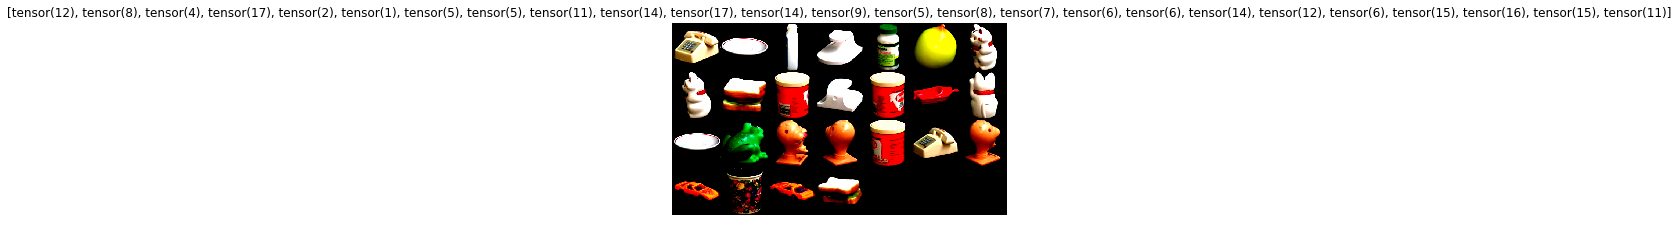

In [6]:
import torchvision
import matplotlib.pyplot as plt
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs,7)
    imshow(out, title=[classes[x] for x in range(len(classes))])

# Get a batch of training data
inputs, labels = next(iter(dataloaders))
show_databatch(inputs, labels)

In [0]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    avg_loss = 0.0
    avg_acc = 0.0
    avg_loss_test = 0.0
    avg_acc_test = 0.0

    train_batches = len(dataloaders)
    test_batches = len(dataloaders_test)
    print("train_batches length,",train_batches)
    print("test_batches length,",test_batches)
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print('-' * 10)
        
        loss_train = 0
        loss_test = 0
        acc_train = 0
        acc_test = 0
        
        model.train(True)
        
        for i, data in enumerate(dataloaders):
            
            inputs, labels = data
            
            if use_gpu:
              inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
              inputs, labels = Variable(inputs), Variable(labels)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
                        
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            loss_train += loss.data
            acc_train += torch.sum(preds == labels.data)
            #print("acc_train=",acc_train)
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        print()
        # * 2 as we only used half of the dataset
        avg_loss = loss_train  / len(dataset_train)
        #print("before avg acc=",acc_train)
        print(10*"*")
        avg_acc = float(acc_train.data) / float(len(dataset_train))
        
        model.train(False)
        model.eval()
            
        for i, data in enumerate(dataloaders_test):
            #if i % 100 == 0:
            #print("Test batch \n")#{}/{}".format(i, test_batches), end='', flush=True)
                
            inputs, labels = data
            
            if use_gpu:
              inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
            else:
              inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss_test += loss.data
            acc_test += torch.sum(preds == labels.data)
            
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        avg_loss_test = (loss_test) / len(dataset_test)
        avg_acc_test = float(acc_test) / float(len(dataset_test))
        
        #print()
        print("Epoch {} result: ".format(epoch))
        print("Avg loss (train): {:.4f}".format(avg_loss))
        print("Avg acc (train): {:.4f}".format(avg_acc))
        print("Avg loss (test): {:.4f}".format(avg_loss_test))
        print("Avg acc (test): {:.4f}".format(avg_acc_test))
        print('-' * 10)
        print()
        
        if avg_acc_test > best_acc:
            best_acc = avg_acc_test
            best_model_wts = copy.deepcopy(model.state_dict())
        
    elapsed_time = time.time() - since
    #print()
    print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Best acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

In [9]:
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable


use_gpu = torch.cuda.is_available()

print(torch.cuda.is_available())
#cuda() will move everything to the GPU side
if use_gpu:
    model.cuda() 


for param in model.parameters():
    #print ("param:p",param)
    param.requires_grad = True

    
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

print("Training")
train_model(model, criterion, optimizer_ft, lr_scheduler, 10)

torch.save(model.state_dict(), 'assgn2_PrasanthParaseelli_AI00051_DL_chkpt.pt')

True
Training
train_batches length, 94
test_batches length, 94
Epoch 0/10
----------

**********


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch 0 result: 
Avg loss (train): 0.0478
Avg acc (train): 0.9679
Avg loss (test): 0.0281
Avg acc (test): 1.0000
----------

Epoch 1/10
----------

**********
Epoch 1 result: 
Avg loss (train): 0.0411
Avg acc (train): 0.9829
Avg loss (test): 0.0207
Avg acc (test): 1.0000
----------

Epoch 2/10
----------

**********
Epoch 2 result: 
Avg loss (train): 0.0346
Avg acc (train): 0.9906
Avg loss (test): 0.0152
Avg acc (test): 1.0000
----------

Epoch 3/10
----------

**********
Epoch 3 result: 
Avg loss (train): 0.0303
Avg acc (train): 0.9923
Avg loss (test): 0.0125
Avg acc (test): 1.0000
----------

Epoch 4/10
----------

**********
Epoch 4 result: 
Avg loss (train): 0.0263
Avg acc (train): 0.9966
Avg loss (test): 0.0093
Avg acc (test): 1.0000
----------

Epoch 5/10
----------

**********
Epoch 5 result: 
Avg loss (train): 0.0224
Avg acc (train): 0.9953
Avg loss (test): 0.0081
Avg acc (test): 1.0000
----------

Epoch 6/10
----------

**********
Epoch 6 result: 
Avg loss (train): 0.0208
Avg 